# **CDA Block 5 Assignment**


**Instructions**

**Make a copy of this notebook.**

**Rename the notebook to *your_name - Block 4 Assignment.ipynb*.**


##Introduction

We will be looking at the sales of a bicycle company. The data spans across sales, customer demographics and products. The datasets are just a small part of a much larger database. 

Such datasets are very common in a business setting, where different information are kept in different tables and connected via one or two variables (foreign keys).

The business objectives for this assignment are

1. Understanding more about the customers and their spending habits
2. Which group of customers to target
3. Predicting the lifetime value of each customer





## About the datasets

The file **aw_bicycle.xlsx** (in Block 4 data folder) contains a few sheets:

* **Sales Customer**: connecting file between customer and sales
* **Sales SalesOrderHeader**: information regarding sales orders (order/invoice level)
* **Sales SalesOrderDetail**: information regarding each sales item (itemized level)
* **Sales vPersonDemographics**: customer attributes (e.g. birthday, marital status, gender, etc.)
* **Production Product**: product name and attributes



To connect the datasets, here are the key columns/variables:

* **Sales Customer** to **Sales SalesOrderHeader**: *CustomerID*
* **Sales Customer** to **Sales vPersonDemographics**: *PersonID* to *BusinessEntityID*
* **Sales SalesOrderHeader** to **Sales SalesOrderDetail**: *SalesOrderID*
* **Sales SalesOrderDetail** to **Production Product**: *ProductID*



##**To do**





###RFM Clustering Analysis

1.   Connect the **SalesOrderDetail** to **SalesOrderHeader** such that you can perform a Recency, Frequency, Monetary analysis
  * **Recency**: Use the latest *OrderDate* as the benchmark to measure the number of days a customer (*CustomerID*) last purchased.
  * **Frequency**: Count the number of *SalesOrderID* at the detailed item level per customer.
  * **Monetary**: Sum the total of *LineTotal* (Quantity * Unit Price) at the detailed item level per customer.
  * Combine all 3 metrics at the customer level (each row is one unique customer).
  * Remove outliers if you need (trim by 1st and 99th percentile).

2. Perform a clustering (kmeans) analysis on the **RFM** dataset.
  * How many number of clusters did you choose and why?
  * Which group of customers are important in terms of RFM?
    * Is there enough customers in this group? If not, which other group should you focus your attention on?
  * Which group of customers you should ignore?

###Customer Lifetime Value Prediction

There are many definitions of lifetime value of a customer. The general idea is the **average spending of a customer** mulitipled by the **time they spend at your business**.

1. We will define lifetime value of a customer by using our RFM dataset (at per customer level).
  * Find the *average_spend_value* (average Spend value per customer) by taking *monetary* / *frequency*
  * Define *max_no_days* (maximum number of days) by the total length of days in the dataset (max - min *OrderDate*).
  * Define the *years_of_service* to each customer by taking (*max_no_days* - *recency*) / 365.
  * Define *lifetime_value* by multiplying *average_spend_value* by *years_of_service*.

2. We need some demographics of customers to help us predict what are the important factors that can help us predict the lifetime value. 
  * Connect the **RFM** dataset to **Sales vPersonDemographics** via **SalesCustomer**. Be sure to remove any NA records. 
  * Run a prediction model (Regression or Classification)
    * Target variable: *lifetime_value*.
    * Compare and select the best model based on minimum MAPE (Regression) or maximum F1 (Classification).
    * Explore the important features of the best model, and extract the demographics of the customers based on the important features. What can be said regarding such customers?
    * Optional: Plot and compare the customers between different groups
    * Optional: What are the kind of products the customers bought? Have to connect to **Production Product** dataset. 

##Setup

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# install required packages
!pip install pandas_profiling
!pip install pycaret
!pip install shap
!pip install markupsafe==2.0.1
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 1.3 MB 54.2 MB/s 
     |████████████████████████████████| 5.0 MB 59.1 MB/s 
     |████████████████████████████████| 25.8 MB 1.2 MB/s 
     |████████████████████████████████| 2.0 MB 52.1 MB/s 
     |████████████████████████████████| 3.3 MB 53.3 MB/s 
     |████████████████████████████████| 325 kB 62.5 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 40.2 MB/s 
     |████████████████████████████████| 141 kB 65.8 MB/s 
     |████████████████████████████████| 167 kB 68.7 MB/s 
     |████████████████████████████████| 662 kB 76.7 MB/s 
     |████████████████████████████████| 16.5 MB 50.4 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.4 MB 5.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstanpy 1.0.8 requires n

In [3]:
# import required packages
import os
import pandas as pd
import numpy as np
import pandas_profiling


##Read Files

In [4]:
# define folder path
folder_path = '/content/drive/MyDrive/cda_data/Block 5'

file_path = os.path.join(folder_path, 'aw_bicycle.xlsx')

print(file_path)


/content/drive/MyDrive/cda_data/Block 5/aw_bicycle.xlsx


In [5]:
# read in excel file
# https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

# read sales customer dataframe
df_sales_customer = pd.read_excel(file_path,
                              sheet_name='Sales Customer',
                              )
'/content/drive/MyDrive/cda_data/Block 5/aw_bicycle.xlsx'
df_sales_customer

CustomerID  PersonID  StoreID  TerritoryID AccountNumber  \
0           11015   10963.0      NaN            4    AW00011015   
1           11016    3800.0      NaN            4    AW00011016   
2           11023    4373.0      NaN            4    AW00011023   
3           11024   16843.0      NaN            4    AW00011024   
4           11036   20539.0      NaN            4    AW00011036   
...           ...       ...      ...          ...           ...   
19815         647       NaN   1968.0            4    AW00000647   
19816         648       NaN   1066.0            4    AW00000648   
19817         649       NaN   1376.0            4    AW00000649   
19818         671       NaN   1390.0            4    AW00000671   
19819         674       NaN   1392.0            4    AW00000674   

                                    rowguid        ModifiedDate  
0      F791BD74-EB82-4631-B9FC-F9FEE621FD13 2014-09-12 11:15:07  
1      023843CA-25FB-42BF-AC37-FAF6F4120DAC 2014-09-12 11:15:07  
2      A2833BD8-44A8-4665-808E-33E19ECD7F54 2014-09-12 11:15:07  
3      EE8EEBF8-117C-4027-873D-6113B0E97489 2014-09-12 11:15:07  
4      2E40BEAF-4A55-4E4D-A87D-009CC27D4378 2014-09-12 11:15:07  
...                                     ...                 ...  
19815  F36E88F4-27E1-4636-9BD4-24DAF44C4141 2014-09-12 11:15:07  
19816  A47D117D-1878-4160-8A37-0B1581D441D6 2014-09-12 11:15:07  
19817  6E4F5184-9CA2-4009-A867-331DB4B4628A 2014-09-12 11:15:07  
19818  BF1718C1-A06B-49D9-AFFA-B445E82B2B9A 2014-09-12 11:15:07  
19819  821FF209-815B-4EAA-806F-9106F3FE9424 2014-09-12 11:15:07  

[19820 rows x 7 columns]

In [6]:
# read sales order header
df_sales_order_header = pd.read_excel(file_path,
                              sheet_name='Sales SalesOrderHeader',
                              )
df_sales_order_header

SalesOrderID  RevisionNumber  OrderDate    DueDate   ShipDate  Status  \
0             43702               8 2011-06-01 2011-06-13 2011-06-08       5   
1             43706               8 2011-06-02 2011-06-14 2011-06-09       5   
2             43707               8 2011-06-02 2011-06-14 2011-06-09       5   
3             43713               8 2011-06-04 2011-06-16 2011-06-11       5   
4             43719               8 2011-06-05 2011-06-17 2011-06-12       5   
...             ...             ...        ...        ...        ...     ...   
31460         71899               8 2014-05-01 2014-05-13 2014-05-08       5   
31461         71902               8 2014-05-01 2014-05-13 2014-05-08       5   
31462         71915               8 2014-05-01 2014-05-13 2014-05-08       5   
31463         71920               8 2014-05-01 2014-05-13 2014-05-08       5   
31464         71923               8 2014-05-01 2014-05-13 2014-05-08       5   

       OnlineOrderFlag SalesOrderNumber PurchaseOrderNumber   AccountNumber  \
0                 True          SO43702                 NaN  10-4030-027645   
1                 True          SO43706                 NaN  10-4030-027621   
2                 True          SO43707                 NaN  10-4030-027616   
3                 True          SO43713                 NaN  10-4030-027601   
4                 True          SO43719                 NaN  10-4030-027612   
...                ...              ...                 ...             ...   
31460            False          SO71899        PO4582142611  10-4020-000025   
31461            False          SO71902        PO5539125166  10-4020-000061   
31462            False          SO71915        PO2349143275  10-4020-000006   
31463            False          SO71920        PO4002189853  10-4020-000674   
31464            False          SO71923         PO174173096  10-4020-000277   

       ...  CreditCardID  CreditCardApprovalCode  CurrencyRateID    SubTotal  \
0      ...        8087.0          1230194Vi41919             NaN   3578.2700   
1      ...       10912.0           230189Vi56258             NaN   3578.2700   
2      ...       19069.0           230298Vi99064             NaN   3578.2700   
3      ...       16570.0           830288Vi85808             NaN   3578.2700   
4      ...        5998.0          1130295Vi31203             NaN   3578.2700   
...    ...           ...                     ...             ...         ...   
31460  ...        9458.0            87069Vi48753             NaN   1856.2068   
31461  ...       10623.0           107092Vi54768             NaN  59894.2092   
31462  ...       18460.0            47115Vi95867             NaN   1732.8900   
31463  ...       16704.0            57128Vi86516             NaN   2527.1280   
31464  ...       16754.0           127133Vi86783             NaN     96.1088   

          TaxAmt    Freight    TotalDue Comment  \
0       286.2616    89.4568   3953.9884     NaN   
1       286.2616    89.4568   3953.9884     NaN   
2       286.2616    89.4568   3953.9884     NaN   
3       286.2616    89.4568   3953.9884     NaN   
4       286.2616    89.4568   3953.9884     NaN   
...          ...        ...         ...     ...   
31460   193.2538    60.3918   2109.8524     NaN   
31461  5924.7046  1851.4702  67670.3840     NaN   
31462   170.9785    53.4308   1957.2993     NaN   
31463   238.4634    74.5198   2840.1112     NaN   
31464     8.5233     2.6635    107.2956     NaN   

                                    rowguid  ModifiedDate  
0      9310C7F0-9A84-4CE9-BE08-F700FB1AADF7    2011-06-08  
1      F02C4CB6-A5B5-4CE4-9473-CB084E383196    2011-06-09  
2      0DA77D6E-223E-4BC6-A2ED-43B387692C68    2011-06-09  
3      9DE30294-9066-4988-A3AD-09A0713348E5    2011-06-11  
4      BF5155EB-C5BE-4245-8FC4-F801DB5B052D    2011-06-12  
...                                     ...           ...  
31460  31D41E8F-6F43-4CAE-BEE3-3CCCB262F231    2014-05-08  
31461  137850D6-EFDF-4DE1-920F-5757A86CDAAF

In [7]:
# read sales order details
df_sales_order_detail = pd.read_excel(file_path,
                              sheet_name='Sales SalesOrderDetail',
                              )
df_sales_order_detail

SalesOrderID  SalesOrderDetailID CarrierTrackingNumber  OrderQty  \
0              51178               37753                   NaN         1   
1              51180               37760                   NaN         1   
2              51191               37790                   NaN         1   
3              51196               37804                   NaN         1   
4              51197               37809                   NaN         1   
...              ...                 ...                   ...       ...   
121312         59075               70453          1ED6-419E-AF         1   
121313         59075               70457          1ED6-419E-AF         1   
121314         59076               70467          6CC1-43A5-AC         1   
121315         59076               70468          6CC1-43A5-AC         1   
121316         59076               70471          6CC1-43A5-AC         1   

        ProductID  SpecialOfferID  UnitPrice  UnitPriceDiscount  LineTotal  \
0             870               1      4.990                0.0      4.990   
1             870               1      4.990                0.0      4.990   
2             870               1      4.990                0.0      4.990   
3             870               1      4.990                0.0      4.990   
4             870               1      4.990                0.0      4.990   
...           ...             ...        ...                ...        ...   
121312        949               1    105.294                0.0    105.294   
121313        970               1    728.910                0.0    728.910   
121314        884               1     32.394                0.0     32.394   
121315        782               1   1376.994                0.0   1376.994   
121316        868               1     41.994                0.0     41.994   

                                     rowguid ModifiedDate  
0       EA75710F-2568-42FF-B92B-1518FE295200   2013-05-30  
1       48A11063-A834-497E-B52B-82EE30589F4C   2013-05-30  
2       FC5AE823-6DB6-46F1-938C-C964060DBF0D   2013-05-31  
3       EC5E95F4-4410-4872-9166-364E2C60C878   2013-05-31  
4       6E7DDB1D-BAF3-4F44-9B1B-6BCFE86ECD22   2013-05-31  
...                                      ...          ...  
121312  4CE57B16-C644-4484-A061-08E0CA77CB27   2013-10-30  
121313  F9DD7EE1-7181-420D-B387-E8C69F721CFB   2013-10-30  
121314  E152D372-9FE7-4DCE-9A12-CB119592F718   2013-10-30  
121315  3E8893A5-09F5-4778-9D8F-81E7134337C8   2013-10-30  
121316  591C3E24-44EA-4965-92B2-50EB60606CE2   2013-10-30  

[121317 rows x 11 columns]

In [8]:
# read in product file
df_product = pd.read_excel(file_path,
                           sheet_name = 'Production Product')
df_product

ProductID                    Name ProductNumber  MakeFlag  \
0            1         Adjustable Race       AR-5381     False   
1            2            Bearing Ball       BA-8327     False   
2          323              Crown Race       CR-9981     False   
3          325                 Decal 1       DC-8732     False   
4          326                 Decal 2       DC-9824     False   
..         ...                     ...           ...       ...   
499        992  Mountain-500 Black, 48    BK-M18B-48      True   
500        993  Mountain-500 Black, 52    BK-M18B-52      True   
501        997      Road-750 Black, 44    BK-R19B-44      True   
502        998      Road-750 Black, 48    BK-R19B-48      True   
503        999      Road-750 Black, 52    BK-R19B-52      True   

     FinishedGoodsFlag  Color  SafetyStockLevel  ReorderPoint  StandardCost  \
0                False    NaN              1000           750        0.0000   
1                False    NaN              1000           750        0.0000   
2                False    NaN              1000           750        0.0000   
3                False    NaN              1000           750        0.0000   
4                False    NaN              1000           750        0.0000   
..                 ...    ...               ...           ...           ...   
499               True  Black               100            75      294.5797   
500               True  Black               100            75      294.5797   
501               True  Black               100            75      343.6496   
502               True  Black               100            75      343.6496   
503               True  Black               100            75      343.6496   

     ListPrice  ... ProductLine Class Style  ProductSubcategoryID  \
0         0.00  ...         NaN   NaN   NaN                   NaN   
1         0.00  ...         NaN   NaN   NaN                   NaN   
2         0.00  ...         NaN   NaN   NaN                   NaN   
3         0.00  ...         NaN   NaN   NaN                   NaN   
4         0.00  ...         NaN   NaN   NaN                   NaN   
..         ...  ...         ...   ...   ...                   ...   
499     539.99  ...           M     L     U                   1.0   
500     539.99  ...           M     L     U                   1.0   
501     539.99  ...           R     L     U                   2.0   
502     539.99  ...           R     L     U                   2.0   
503     539.99  ...           R     L     U                   2.0   

     ProductModelID SellStartDate SellEndDate DiscontinuedDate  \
0               NaN    2008-04-30         NaT              NaN   
1               NaN    2008-04-30         NaT              NaN   
2               NaN    2008-04-30         NaT              NaN   
3               NaN    2008-04-30         NaT              NaN   
4               NaN    2008-04-30         NaT              NaN   
..              ...           ...         ...              ...   
499            23.0    2013-05-30         NaT              NaN   
500            23.0    2013-05-30         NaT              NaN   
501            31.0    2013-05-30         NaT              NaN   
502            31.0    2013-05-30         NaT              NaN   
503            31.0    2013-05-30         NaT              NaN   

                                  rowguid            ModifiedDate  
0    694215B7-08F7-4C0D-ACB1-D734BA44C0C8 2014-02-08 10:01:36.827  
1    58AE3C20-4F3A-4749-A7D4-D568806CC537 2014-02-08 10:01:36.827  
2    51A32CA6-65A1-4C31-AF2B-D9E4F5D631D4 2014-02-08 10:01:36.827  
3    05CE123C-A402-478E-AE9B-75D7727AEAAD 2014-02-08 10:01:36.827  
4    A56851F9-1CD7-4E2F-8779-2E773E1B5209 2014-02-08 10:01:36.827  
..                                    ...                     ...  
499  75752E26-A3B6-4264-9B06-F23A4FBDC5A7 2014-02-08 10:01:36.827  
500  69EE3B55-E142-4E4F-AED8-AF02978FBE87 2014-02-08 10:01:36.827  
501  44CE4802-409F-43AB-9B27-

##Merge and Explore Transaction Data

In [9]:
# merge product and sales detail file (main)
df_detail_product = df_sales_order_detail.merge(df_product,
                          how='left',
                          on='ProductID',
                          suffixes=['_sales_det', '_prod'])

In [10]:
# merge sales order header and details (main)

df_sales_order = pd.merge(left=df_detail_product,
                        right=df_sales_order_header,
                        how='left',
                        on='SalesOrderID',
                        suffixes=['_sales_det', 'sales_head']
                        )

df_sales_order

SalesOrderID  SalesOrderDetailID CarrierTrackingNumber  OrderQty  \
0              51178               37753                   NaN         1   
1              51180               37760                   NaN         1   
2              51191               37790                   NaN         1   
3              51196               37804                   NaN         1   
4              51197               37809                   NaN         1   
...              ...                 ...                   ...       ...   
121312         59075               70453          1ED6-419E-AF         1   
121313         59075               70457          1ED6-419E-AF         1   
121314         59076               70467          6CC1-43A5-AC         1   
121315         59076               70468          6CC1-43A5-AC         1   
121316         59076               70471          6CC1-43A5-AC         1   

        ProductID  SpecialOfferID  UnitPrice  UnitPriceDiscount  LineTotal  \
0             870               1      4.990                0.0      4.990   
1             870               1      4.990                0.0      4.990   
2             870               1      4.990                0.0      4.990   
3             870               1      4.990                0.0      4.990   
4             870               1      4.990                0.0      4.990   
...           ...             ...        ...                ...        ...   
121312        949               1    105.294                0.0    105.294   
121313        970               1    728.910                0.0    728.910   
121314        884               1     32.394                0.0     32.394   
121315        782               1   1376.994                0.0   1376.994   
121316        868               1     41.994                0.0     41.994   

                           rowguid_sales_det  ... CreditCardID  \
0       EA75710F-2568-42FF-B92B-1518FE295200  ...       3760.0   
1       48A11063-A834-497E-B52B-82EE30589F4C  ...      16046.0   
2       FC5AE823-6DB6-46F1-938C-C964060DBF0D  ...       2365.0   
3       EC5E95F4-4410-4872-9166-364E2C60C878  ...       5728.0   
4       6E7DDB1D-BAF3-4F44-9B1B-6BCFE86ECD22  ...      10041.0   
...                                      ...  ...          ...   
121312  4CE57B16-C644-4484-A061-08E0CA77CB27  ...       7657.0   
121313  F9DD7EE1-7181-420D-B387-E8C69F721CFB  ...       7657.0   
121314  E152D372-9FE7-4DCE-9A12-CB119592F718  ...      15829.0   
121315  3E8893A5-09F5-4778-9D8F-81E7134337C8  ...      15829.0   
121316  591C3E24-44EA-4965-92B2-50EB60606CE2  ...      15829.0   

       CreditCardApprovalCode CurrencyRateID    SubTotal     TaxAmt  \
0               216547Vi19810            NaN   2334.9700   186.7976   
1               820164Vi82960            NaN   2542.3100   203.3848   
2               719210Vi12295            NaN   2344.9600   187.5968   
3               439136Vi29988         8411.0    638.9500    51.1160   
4               639470Vi51713         8411.0   2318.9600   185.5168   
...                       ...            ...         ...        ...   
121312           48746Vi39668            NaN  35538.9074  3400.7541   
121313           48746Vi39668            NaN  35538.9074  3400.7541   
121314           18769Vi81822            NaN   4331.3520   413.9397   
121315           18769Vi81822            NaN   4331.3520   413.9397   
121316           18769Vi81822            NaN   4331.3520   413.9397   

          Freight    TotalDue  Comment                               rowguid  \
0         58.3743   2580.1419      NaN  968B58F6-8CA8-4163-B3E0-14C386E8DFD6   
1         63.5578   2809.2526      NaN  7FFE4ECC-5FFA-4EFC-BEDE-F338CD35E2F1   
2         58.6240   2591.1808      NaN  96EFBBA5-0145-4025-8F9F-0EED56CA7B08   
3         15.9738    706.0398      NaN  6E5983D9-21CF-4500-A5BF-BB14656959F4   
4         57.9740   2562.4508      NaN  6067B94A-80CC-43CC-A038-1DCA9C3E3374   
...           ...         ...   

In [11]:
# run pandas profiling to take a look at the sales order header and detailed data
df_sales_order.profile_report(minimal=True)

Output hidden; open in https://colab.research.google.com to view.

##Recency, Freqency, Monetary

###Create recency variable


In [12]:
# based on latest OrderDate as days = 0 (max OrderDate - current line OrderDate)
# grouped by CustomerID
# set the index as CustomerID
# recency variable will be timedelta datatype, convert to integer using dt.days() 

df_sales_order['recency'] = max(df_sales_order['OrderDate']) - df_sales_order['OrderDate']
df_sales_order.sort_values('recency', ascending=True)
rfm_r = df_sales_order.groupby('CustomerID')['recency'].min()
rfm_r = rfm_r.reset_index().set_index('CustomerID')
rfm_r['recency'] = rfm_r.recency.dt.days
rfm_r

recency
CustomerID         
11000           270
11001            49
11002           339
11003           263
11004           272
...             ...
30114           121
30115            91
30116           121
30117            91
30118            60

[19119 rows x 1 columns]

###Create frequency variable

In [13]:
# count the number of SalesOrderID, grouped by CustomerID (make sure it's sales detailed item level)
# set the index as CustomerID
# rename column name to 'frequency'

rfm_f = df_sales_order.groupby('CustomerID')['SalesOrderID'].count()
rfm_f = rfm_f.reset_index().set_index('CustomerID')
rfm_f.rename({'SalesOrderID': 'frequency'}, axis=1, inplace=True)
rfm_f

frequency
CustomerID           
11000               8
11001              11
11002               4
11003               9
11004               6
...               ...
30114              30
30115              21
30116             119
30117             436
30118             289

[19119 rows x 1 columns]

###Create monetary variable


In [14]:
# use LineTotal as already quantity * unit_price
# LineTotal is the total amount for each line item
# sum LineTotal, groupby CustomerID
# set the index as CustomerID
# rename column name to 'monetary'
rfm_m = df_sales_order.groupby('CustomerID')['LineTotal'].sum()
rfm_m = rfm_m.reset_index().set_index('CustomerID')
rfm_m.rename({'LineTotal': 'monetary'}, axis=1, inplace=True)
rfm_m

monetary
CustomerID               
11000         8248.990000
11001         6383.880000
11002         8114.040000
11003         8139.290000
11004         8196.010000
...                   ...
30114        11652.991100
30115         8917.559400
30116       187114.201050
30117       816755.576276
30118       278568.569942

[19119 rows x 1 columns]

###Combine recency, frequency, monetary datasets together

In [15]:
# makign sure there are no missing values
# CustomerID should be the index, 'recency', 'frequency, 'monetary' should be the columns

rfm = pd.concat([rfm_r, rfm_f, rfm_m], axis=1, join='inner')
rfm.describe()

recency     frequency       monetary
count  19119.000000  19119.000000   19119.000000
mean     190.267483      6.345363    5745.404122
std      150.423605     26.478444   38800.383347
min        0.000000      1.000000       1.374000
25%       85.000000      2.000000      54.980000
50%      165.000000      3.000000     548.980000
75%      263.000000      4.000000    2822.386050
max     1126.000000    530.000000  877107.192221

### Checking outliers on 'monetary' column

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


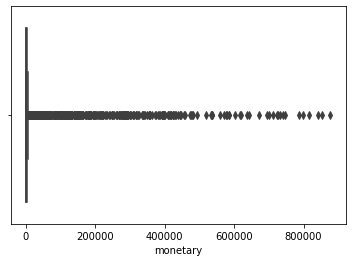

In [16]:
# plot boxplot of 'monetary'
import seaborn as sns
sns.boxplot('monetary', orient='v', data=rfm)

###Remove Outliers from Monetary

In [17]:
#### removing outliers 
# trim the dataset at 1 percentile and 99th percentile
# which means removing records below 1st percentile and above 99th percentile
# first, establish the 1st and 99th percentile

# Check the descriptive statistics to see if the numbers are better (especially monetary)

In [18]:
# First, establish the 1st and 99th percentile
p1 = rfm.monetary.quantile(0.01)
p99 = rfm.monetary.quantile(0.99)

# Check the descriptive statistics 
rfm[(rfm.monetary >= p1) & (rfm.monetary <= p99)].describe()

recency     frequency       monetary
count  18851.000000  18851.000000   18851.000000
mean     190.459339      4.106838    2366.388156
std      149.985116      8.686692    8216.586379
min        0.000000      1.000000       4.990000
25%       85.000000      2.000000      54.980000
50%      166.000000      3.000000     548.980000
75%      264.000000      4.000000    2751.417500
max     1126.000000    181.000000  144602.581600

**Recency, Frequency and Monetary based on 1st percentile and 99 percentile dataset.**


Based on the dataset above on the 1st and 99 percentile, the average spending power is about 2,366 which are higher than 50% of 548. Although the frequency is at 4 times but the average spending power for the customer are much higher.

1. Such high average spending customers are usually our key customers and we should retain them to visit our bicycle shop more frequently. 

2. We should focus on those items that they purchased and understand what are those items that those group of customers are interested. 

3. We should also target other key segmentation, those mass custmomers which at 25% spending around 55 and visited the store 2 times to gain more market share. 

In [19]:
# apply the changes to remove records below and above 99th percentile
rfm = rfm[(rfm.monetary >= p1) & (rfm.monetary <= p99)]
rfm

recency  frequency     monetary
CustomerID                                 
11000           270          8    8248.9900
11001            49         11    6383.8800
11002           339          4    8114.0400
11003           263          9    8139.2900
11004           272          6    8196.0100
...             ...        ...          ...
30106           426        114  101203.5836
30108           457        105  144602.5816
30110           426          6    1625.2755
30114           121         30   11652.9911
30115            91         21    8917.5594

[18851 rows x 3 columns]

**By appplying to remove record below 1st percentile and 99th percentile**

After exploring above figure, the following observation can be draw: 

- Compared recency, frequency and monetary we have better view of those customers. 

- Those customers visited our bicycle store with less frequency actually spent more money than those visited our store more frequently. Example "customer ID" 11000, 11002,111003,11004,301110. 

- Although customer ID 11000, 11002,111003,11004,301110 visit the store less frequently and more spending power, but their recency between their visits for each visit are longer. 

In [20]:
# output cleaned file so can refer to this file in the future
folder_path = '/content/drive/MyDrive/Colab Notebooks'
rfm.to_csv(os.path.join(folder_path, 'rfm_simon.csv'), index=False)

### Use pandas profiling to check the RFM dataset

In [21]:
rfm.profile_report(explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Clustering

### Setup model

In [22]:
# run clustering using pycaret
# Pandas profiling helps us to explore the data easily
!pip3 install swifter
# We may also use a couple AutoML tools to increase our productivity
# not used in this notebook
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

!pip3 install pycaret
!pip3 install shap
!pip install pyyaml==5.4.1
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 5.2 MB/s 
     |████████████████████████████████| 280 kB 62.8 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=2210cdea2c3f6897b4d08e77f3b68bbde88c099e0ec1b120bbc1b4d30f58f4ef
  Stored in directory: /root/.cache/pip/wheels/08/66/b4/921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 139 kB/s
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324949 sha256=0694991315328026e18d277aa64e7d216d68dbf53ee8ba5dd099738faebe4aea
  Stored in directory: /tmp/pip-ephem-wheel-cache-qaldcmks/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Failed to build pandas-profiling
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.5.0
    Uninstalling pandas-profiling-3.5.0:
      Successfully uninstalled pandas-profiling-3.5.0
    Running setup.py install for pandas-profiling ... done
  DEPRECATION: pandas-profiling was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
ERROR: 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# run clustering usiny pycaret
from pycaret.clustering import *

model = setup(data=rfm,
              silent=True)

Description                 Value
0                               session_id                   869
1                            Original Data            (18851, 3)
2                           Missing Values                 False
3                         Numeric Features                     3
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (18851, 3)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  91d2
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [24]:
# run through multiple clusters to check which has the best results

# create empty dataframe to store results
rfm_results = pd.DataFrame()

In [25]:
from tqdm import trange 
# Test kmeans clustering
for i in trange(2, 11):
    kmeans = create_model('kmeans',
                          num_clusters=i,
                          init='k-means++',
                          n_init=10,
                          max_iter=300,
                          random_state=42
                          )
    metrics = pull()  # Extract results table into dataframe
    metrics['algo'] = 'kmeans'
    metrics['num_clusters'] = i
    rfm_results = rfm_results.append(metrics)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.7081         204709.319           0.477            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 9
INFO:logs:master_model_container: 9
INFO:logs:display_container: 10
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................
100%|██████████| 9/9 [01:01<00:00,  6.79s/it]


In [26]:
# check the results of mulitiple number of clusters
rfm_results

# Silhoutte says 2 clusters
# Calinski says 10 or more clusteres
# Davis says 2 clusters (smaller is better)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.9695         72692.6599          0.2827            0           0   
0      0.9424         68919.9982          0.4180            0           0   
0      0.7226         92845.0921          0.4702            0           0   
0      0.7233        105439.2533          0.4980            0           0   
0      0.7237        115934.8467          0.4864            0           0   
0      0.7130        140459.0392          0.4959            0           0   
0      0.7142        153007.5842          0.4819            0           0   
0      0.7164        174775.6447          0.4686            0           0   
0      0.7081        204709.3190          0.4770            0           0   

   Completeness    algo  num_clusters  
0             0  kmeans             2  
0             0  kmeans             3  
0             0  kmeans             4  
0             0  kmeans             5  
0             0  kmeans             6  
0             0  kmeans             7  
0             0  kmeans             8  
0             0  kmeans             9  
0             0  kmeans            10

**The results seems like Silhoutte and Davies-Bouldin imply that 2 clusters are the best**


- Calinski-Harabasz measures the dispersion within cluster against dispersion between clusters. The data could be dispersed pretty evenly.Therefore, Calinski-Harabasz 10 clusters are the best.

- The Davies-Bouldin measures distance between clusters as compared the size of the cluster itself.Davies-Bouldin result shows that 2 clusters are the lowest and are the best result. 

The results are consistent with the rest of the metrics done prior, but was very clear on which number of clusters is the best.

In [27]:
# Sillhoutte and Calinski-Harabasz, greater the better
# Davies-Boudlin record in get_metrics() is wrong, should be lower the better
get_metrics()

Name       Display Name  \
ID                                                  
silhouette          Silhouette         Silhouette   
chs          Calinski-Harabasz  Calinski-Harabasz   
db              Davies-Bouldin     Davies-Bouldin   
hs           Homogeneity Score        Homogeneity   
ari                 Rand Index         Rand Index   
cs          Completeness Score       Completeness   

                                               Score Function  \
ID                                                              
silhouette      <function silhouette_score at 0x7f73f15c2820>   
chs         <function calinski_harabasz_score at 0x7f73f15...   
db          <function davies_bouldin_score at 0x7f73f15c2af0>   
hs             <function homogeneity_score at 0x7f73ee478e50>   
ari          <function adjusted_rand_score at 0x7f73ee478ca0>   
cs            <function completeness_score at 0x7f73ee478ee0>   

                                          Scorer Target Args  \
ID                                                             
silhouette         make_scorer(silhouette_score)   pred   {}   
chs         make_scorer(calinski_harabasz_score)   pred   {}   
db             make_scorer(davies_bouldin_score)   pred   {}   
hs                make_scorer(homogeneity_score)   pred   {}   
ari             make_scorer(adjusted_rand_score)   pred   {}   
cs               make_scorer(completeness_score)   pred   {}   

            Greater is Better  Needs Ground Truth  Custom  
ID                                                         
silhouette               True               False   False  
chs                      True               False   False  
db                       True               False   False  
hs                       True                True   False  
ari                      True                True   False  
cs                       True                True   False

In [28]:
# let's go with 4 clusters
# create model based on 4 clusters
rfm_kmeans_4 = create_model('kmeans',
                          num_clusters=4,
                          init='k-means++',
                          n_init=10,
                          max_iter=300,
                          random_state=42
                          )

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.7226         92845.0921          0.4702            0           0   

   Completeness  
0             0

INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 11
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


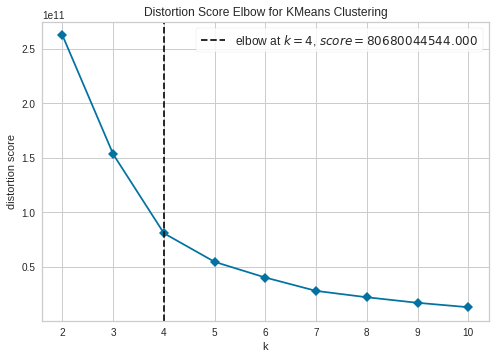

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
# plot the elbow plot to confirm 4 is recommended
plot_model(rfm_kmeans_4, plot='elbow')

**Elbow Plot Result**

Based on the above Elbow plot, we can confirmed that 4 number of clusters will be the best for us to apply on this for our analysis. 

In [30]:
# assign the cluster number (starting from 0) to the RFM dataset

rfm_df = assign_model(rfm_kmeans_4)
rfm_df.Cluster.value_counts()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=42, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(18851, 4)
INFO:logs:assign_model() succesfully completed......................................


Cluster 0    14330
Cluster 2     4353
Cluster 1       88
Cluster 3       80
Name: Cluster, dtype: int64

**How many number of clusters did you choose and why?**

We are using K-means for 4 clusters for our RFM data, from the above clusters information we have more data for our analysis and decision making. 

- Have choose 4 number of clusters for this. Because we need to have sufficient number of clusters for our data analysis and 4 clusters can have a balance view for our decision making. We can better observe which groups are similar to one another but distinct from other groups. 

- If we select 2 and 3 clusters we only have 2 group of customers for us to analysis and this does not provide us meaningful analysis. By using 2 clusters means that 2 clusters are to separated the population into supporters and non-supporters.  

**For our market segmention with cluster analysis**

- Based on our k-means clustering we should spend more budget for cluster 0 and cluster 2, because they are not visiting our store frequently. There must be some reason why there are not our loyal customers, maybe our bike store have some parts or our bicycle can't meet their performance expectation.  

- For cluster 1 88 customers and cluster 3 80 customers have the lowest number of customers visting our store which are quite low as compared to cluster 0 and cluster 2. 

Having say that, we also should not neglect on them as we need to maintain our market shares at the same time, we will also target new customers so that our products will be well known within the country. 

However, there is no "right" or "wrong" answer for the number of clusters. But based on above data information, Silhouette, Calinski and Davies has provided 4 cluster which is the best number of clusters. 

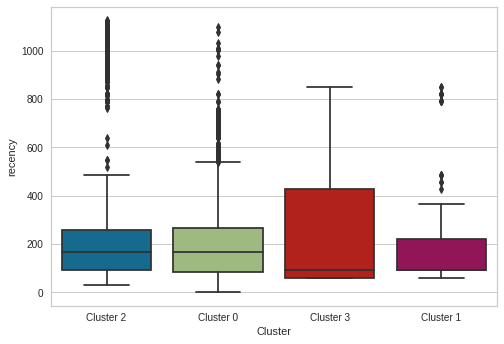

In [31]:
# Clusters vs Recency
sns.boxplot('Cluster', 'recency', data=rfm_df)

For the above clusters, what we can see the recency cluster 0 and cluster 2 has the highest recency as compared to cluster 3 and cluster 1. 

- Cluster 0 and Cluster 2 has the highest recency, this mean that this two clusters of customers are those who did not visit the store frequently. And based on the plot above, recency should be lower thhe better as compared with cluster 1 and cluster 3. This is based on the last order compared to recent order on the maximum number of days.

- We should focus on cluster 0 and 2 on our promotions to get them to visit the store more frequently and gain more market share from our competitors. 

- Cluster 1 and 3 has the lowest recency, this show that this customer group are those who visits our store more often. We should try to retain them as our customers so that they will not go to our competitors store. 





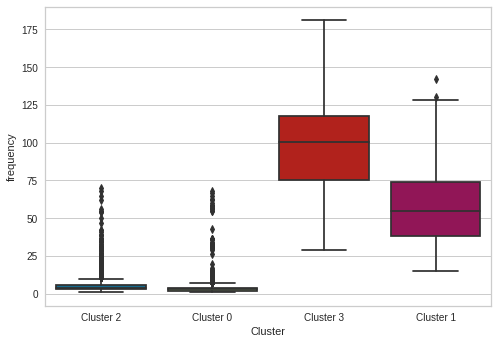

In [32]:
# Clusters vs Frequency
sns.boxplot('Cluster', 'frequency', data=rfm_df)

Cluster 1 and Cluster 3 visit to our store more frequently and we should not spend too much marketing to target them as they are like our VIP customer. 

- By increasing our marketing budget to target cluster 0 and 2, those who are not our loyal customers based on their number of visit to our store. This will likely to turn them to our frequent customers and generate new business for our bicycle store.  

- We should set out a specific promotions for cluster 0 and cluster 2 customers so that they will continue to shop in our store. This will also increase our revenue in the near future. By doing this, we can better managed our budget and spend on those customers that will be effective for our target marketing segmentation. 

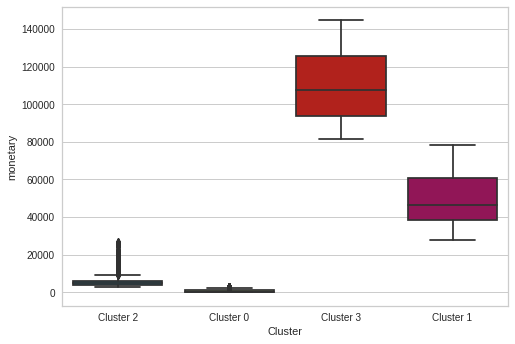

In [33]:
# Clusters vs Monetary Value
sns.boxplot('Cluster', 'monetary', data=rfm_df)

From the monetary plot, we can identified which clusters are those who spent more in our store. Cluster 0 and cluster 2 customers are those that don't spent alot of money when visiting our store less. 

- This could be our products are not meeting their expectation or we may not have those parts or bicycle that fit them. 

- We should get marketing team to roll a marketing plan to attract cluster 0 and cluster 2 customers to visit our store more often and also to target new customer which are not our bicycle fans to join us, so that they can become our supporters in the coming months. By doing this, we will be able to generate more revenue for the company. 

In [34]:
# reset the index so the CustomerID becomes a column
rfm_df.reset_index(inplace=True)

##Calculate Lifetime Value Per Customer

In [35]:
# calculate the average spend value per customer by taking monetary (total amount spent) / frequency (how many times spent)
rfm_df['average_spend_value'] = (rfm_df['monetary'] / rfm_df['frequency'])

In [36]:
# calculate the maximum number of days in the dataset
max_no_days = max(df_sales_order['OrderDate']) - min(df_sales_order['OrderDate'])
max_no_days = max_no_days.days

In [37]:
# find out how long the company has been serving each customer: years of service
# max_no_days - recency
rfm_df['years_of_service'] = (max_no_days - rfm_df['recency']) / 365

In [38]:
# calculate lifetime value
# average spend value * years of service
rfm_df['lifetime_value'] = rfm_df['average_spend_value'] * rfm_df['years_of_service']

In [39]:
rfm_df

CustomerID  recency  frequency     monetary    Cluster  \
0           11000      270          8    8248.9900  Cluster 2   
1           11001       49         11    6383.8800  Cluster 2   
2           11002      339          4    8114.0400  Cluster 2   
3           11003      263          9    8139.2900  Cluster 2   
4           11004      272          6    8196.0100  Cluster 2   
...           ...      ...        ...          ...        ...   
18846       30106      426        114  101203.5836  Cluster 3   
18847       30108      457        105  144602.5816  Cluster 3   
18848       30110      426          6    1625.2755  Cluster 0   
18849       30114      121         30   11652.9911  Cluster 2   
18850       30115       91         21    8917.5594  Cluster 2   

       average_spend_value  years_of_service  lifetime_value  
0              1031.123750          2.345205     2418.197068  
1               580.352727          2.950685     1712.438047  
2              2028.510000          2.156164     4373.801014  
3               904.365556          2.364384     2138.267053  
4              1366.001667          2.339726     3196.069653  
...                    ...               ...             ...  
18846           887.750733          1.917808     1702.535653  
18847          1377.167444          1.832877     2524.178137  
18848           270.879250          1.917808      519.494452  
18849           388.433037          2.753425     1069.521101  
18850           424.645686          2.835616     1204.132287  

[18851 rows x 8 columns]

**Customers Lifetime Value**

- From the above calculation on the customers lifetime value, we can see the average years of serive is around 2 years and coming to 3 years. 

- Based on the frequency data above, those that visited our bike store with less than 10 times are those who spent more money compared to those who visited our store more than 20 to 110 times. This mean that cluster 2 customers although visited our store less times but they spent average about 1,000 dollar or more. 

- After analysis the data, we can confirmed that we should be focusing on cluster 2 customer group for our marketing strategies. So that they will come back to our bike store more often and spend more than previous visits. 

This will help to build positive Return on Investment (ROI) and increase company revenue. 



##Merge Data From Customer Demographics

In [40]:
# read in Sales vPersonDemographics to get Customer demographics

df_person_demographics = pd.read_excel(file_path,
                              sheet_name='Sales vPersonDemographics',
                              )
df_person_demographics

BusinessEntityID  TotalPurchaseYTD DateFirstPurchase  BirthDate  \
0                  3058             19.20        2004-04-07 1979-05-07   
1                  3246            557.49        2003-10-24 1975-11-07   
2                  3089            -24.99        2004-03-04 1976-05-20   
3                  3273            -21.49        2004-02-12 1976-04-08   
4                  3446            -37.01        2004-02-12 1976-01-19   
...                 ...               ...               ...        ...   
19967              2351              0.00               NaT        NaT   
19968              2340              0.00               NaT        NaT   
19969              2326              0.00               NaT        NaT   
19970              2324              0.00               NaT        NaT   
19971              2310              0.00               NaT        NaT   

      MaritalStatus YearlyIncome Gender  TotalChildren  NumberChildrenAtHome  \
0                 S  25001-50000      F            0.0                   0.0   
1                 S  25001-50000      F            0.0                   0.0   
2                 S  25001-50000      F            0.0                   0.0   
3                 S  25001-50000      F            0.0                   0.0   
4                 S  25001-50000      F            0.0                   0.0   
...             ...          ...    ...            ...                   ...   
19967           NaN          NaN    NaN            NaN                   NaN   
19968           NaN          NaN    NaN            NaN                   NaN   
19969           NaN          NaN    NaN            NaN                   NaN   
19970           NaN          NaN    NaN            NaN                   NaN   
19971           NaN          NaN    NaN            NaN                   NaN   

             Education Occupation  HomeOwnerFlag  NumberCarsOwned  
0      Partial College   Clerical            0.0              1.0  
1      Partial College   Clerical            0.0              1.0  
2      Partial College   Clerical            0.0              1.0  
3      Partial College   Clerical            0.0              1.0  
4      Partial College   Clerical            0.0              1.0  
...                ...        ...            ...              ...  
19967              NaN        NaN            NaN              NaN  
19968              NaN        NaN            NaN              NaN  
19969              NaN        NaN            NaN              NaN  
19970              NaN        NaN            NaN              NaN  
19971              NaN        NaN            NaN              NaN  

[19972 rows x 13 columns]

In [41]:
# merge to SalesCustomer to get CustomerID into Person Demographics

df_customer = df_person_demographics.merge(df_sales_customer[['CustomerID', 'PersonID']],
                                      how='left',
                                      left_on='BusinessEntityID',
                                      right_on='PersonID')

df_customer

BusinessEntityID  TotalPurchaseYTD DateFirstPurchase  BirthDate  \
0                  3058             19.20        2004-04-07 1979-05-07   
1                  3246            557.49        2003-10-24 1975-11-07   
2                  3089            -24.99        2004-03-04 1976-05-20   
3                  3273            -21.49        2004-02-12 1976-04-08   
4                  3446            -37.01        2004-02-12 1976-01-19   
...                 ...               ...               ...        ...   
19967              2351              0.00               NaT        NaT   
19968              2340              0.00               NaT        NaT   
19969              2326              0.00               NaT        NaT   
19970              2324              0.00               NaT        NaT   
19971              2310              0.00               NaT        NaT   

      MaritalStatus YearlyIncome Gender  TotalChildren  NumberChildrenAtHome  \
0                 S  25001-50000      F            0.0                   0.0   
1                 S  25001-50000      F            0.0                   0.0   
2                 S  25001-50000      F            0.0                   0.0   
3                 S  25001-50000      F            0.0                   0.0   
4                 S  25001-50000      F            0.0                   0.0   
...             ...          ...    ...            ...                   ...   
19967           NaN          NaN    NaN            NaN                   NaN   
19968           NaN          NaN    NaN            NaN                   NaN   
19969           NaN          NaN    NaN            NaN                   NaN   
19970           NaN          NaN    NaN            NaN                   NaN   
19971           NaN          NaN    NaN            NaN                   NaN   

             Education Occupation  HomeOwnerFlag  NumberCarsOwned  CustomerID  \
0      Partial College   Clerical            0.0              1.0     26212.0   
1      Partial College   Clerical            0.0              1.0     21126.0   
2      Partial College   Clerical            0.0              1.0     18033.0   
3      Partial College   Clerical            0.0              1.0     27832.0   
4      Partial College   Clerical            0.0              1.0     22707.0   
...                ...        ...            ...              ...         ...   
19967              NaN        NaN            NaN              NaN         NaN   
19968              NaN        NaN            NaN              NaN         NaN   
19969              NaN        NaN            NaN              NaN         NaN   
19970              NaN        NaN            NaN              NaN         NaN   
19971              NaN        NaN            NaN              NaN         NaN   

       PersonID  
0        3058.0  
1        3246.0  
2        3089.0  
3        3273.0  
4        3446.0  
...         ...  
19967       NaN  
19968       NaN  
19969       NaN  
19970       NaN  
19971       NaN  

[19972 rows x 15 columns]

In [42]:
# drop customers without demographics
df_customer.dropna(inplace=True)
df_customer

BusinessEntityID  TotalPurchaseYTD DateFirstPurchase  BirthDate  \
0                  3058             19.20        2004-04-07 1979-05-07   
1                  3246            557.49        2003-10-24 1975-11-07   
2                  3089            -24.99        2004-03-04 1976-05-20   
3                  3273            -21.49        2004-02-12 1976-04-08   
4                  3446            -37.01        2004-02-12 1976-01-19   
...                 ...               ...               ...        ...   
19114              4203              0.00        2003-06-25 1961-06-24   
19115              7555              0.00        2002-12-14 1964-06-17   
19116             11037              0.00        2003-09-06 1968-03-12   
19117             19959              0.00        2002-08-25 1973-12-24   
19118             20661              0.00        2003-04-09 1964-01-06   

      MaritalStatus  YearlyIncome Gender  TotalChildren  NumberChildrenAtHome  \
0                 S   25001-50000      F            0.0                   0.0   
1                 S   25001-50000      F            0.0                   0.0   
2                 S   25001-50000      F            0.0                   0.0   
3                 S   25001-50000      F            0.0                   0.0   
4                 S   25001-50000      F            0.0                   0.0   
...             ...           ...    ...            ...                   ...   
19114             S       0-25000      M            1.0                   1.0   
19115             S       0-25000      F            3.0                   2.0   
19116             S       0-25000      M            1.0                   1.0   
19117             S  75001-100000      F            0.0                   5.0   
19118             S   25001-50000      F            2.0                   2.0   

                 Education  Occupation  HomeOwnerFlag  NumberCarsOwned  \
0          Partial College    Clerical            0.0              1.0   
1          Partial College    Clerical            0.0              1.0   
2          Partial College    Clerical            0.0              1.0   
3          Partial College    Clerical            0.0              1.0   
4          Partial College    Clerical            0.0              1.0   
...                    ...         ...            ...              ...   
19114      Partial College      Manual            0.0              0.0   
19115  Partial High School      Manual            1.0              2.0   
19116      Partial College      Manual            0.0              0.0   
19117          High School  Management            1.0              2.0   
19118      Partial College    Clerical            1.0              2.0   

       CustomerID  PersonID  
0         26212.0    3058.0  
1         21126.0    3246.0  
2         18033.0    3089.0  
3         27832.0    3273.0  
4         22707.0    3446.0  
...           ...       ...  
19114     16532.0    4203.0  
19115     16414.0    7555.0  
19116     16574.0   11037.0  
19117     21558.0   19959.0  
19118     16291.0   20661.0  

[18484 rows x 15 columns]

In [43]:
# merge customer demographics to RFM dataset by CustomerID
df_customer_rfm = pd.merge(left=df_customer,
                           right=rfm_df,
                           how='inner',
                           on='CustomerID')

df_customer_rfm

BusinessEntityID  TotalPurchaseYTD DateFirstPurchase  BirthDate  \
0                  3058             19.20        2004-04-07 1979-05-07   
1                  3246            557.49        2003-10-24 1975-11-07   
2                  3089            -24.99        2004-03-04 1976-05-20   
3                  3273            -21.49        2004-02-12 1976-04-08   
4                  3446            -37.01        2004-02-12 1976-01-19   
...                 ...               ...               ...        ...   
18404              4203              0.00        2003-06-25 1961-06-24   
18405              7555              0.00        2002-12-14 1964-06-17   
18406             11037              0.00        2003-09-06 1968-03-12   
18407             19959              0.00        2002-08-25 1973-12-24   
18408             20661              0.00        2003-04-09 1964-01-06   

      MaritalStatus  YearlyIncome Gender  TotalChildren  NumberChildrenAtHome  \
0                 S   25001-50000      F            0.0                   0.0   
1                 S   25001-50000      F            0.0                   0.0   
2                 S   25001-50000      F            0.0                   0.0   
3                 S   25001-50000      F            0.0                   0.0   
4                 S   25001-50000      F            0.0                   0.0   
...             ...           ...    ...            ...                   ...   
18404             S       0-25000      M            1.0                   1.0   
18405             S       0-25000      F            3.0                   2.0   
18406             S       0-25000      M            1.0                   1.0   
18407             S  75001-100000      F            0.0                   5.0   
18408             S   25001-50000      F            2.0                   2.0   

                 Education  ... NumberCarsOwned  CustomerID  PersonID  \
0          Partial College  ...             1.0     26212.0    3058.0   
1          Partial College  ...             1.0     21126.0    3246.0   
2          Partial College  ...             1.0     18033.0    3089.0   
3          Partial College  ...             1.0     27832.0    3273.0   
4          Partial College  ...             1.0     22707.0    3446.0   
...                    ...  ...             ...         ...       ...   
18404      Partial College  ...             0.0     16532.0    4203.0   
18405  Partial High School  ...             2.0     16414.0    7555.0   
18406      Partial College  ...             0.0     16574.0   11037.0   
18407          High School  ...             2.0     21558.0   19959.0   
18408      Partial College  ...             2.0     16291.0   20661.0   

       recency  frequency  monetary    Cluster  average_spend_value  \
0          115          2     23.78  Cluster 0            11.890000   
1          281          3    565.47  Cluster 0           188.490000   
2          149          1     24.99  Cluster 0            24.990000   
3          170          1     21.49  Cluster 0            21.490000   
4          170          3     62.97  Cluster 0            20.990000   
...        ...        ...       ...        ...                  ...   
18404      129          3   4921.69  Cluster 2          1640.563333   
18405      245          3   4919.30  Cluster 2          1639.766667   
18406       63          3     44.97  Cluster 0            14.990000   
18407      144          3   4919.30  Cluster 2          1639.766667   
18408      372          3   4921.69  Cluster 2          1640.563333   

      years_of_service  lifetime_value  
0             2.769863       32.933671  
1             2.315068      436.367260  
2             2.676712       66.891041  
3             2.619178       56.286137  
4             2.619178       54.976548  
...                ...             ...  
18404         2.731507     4481.209982  
18405         2.413699     3957.902557  
18406         2.912329       43.655808  
18407

In [44]:
df_customer_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18409 entries, 0 to 18408
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BusinessEntityID      18409 non-null  int64         
 1   TotalPurchaseYTD      18409 non-null  float64       
 2   DateFirstPurchase     18409 non-null  datetime64[ns]
 3   BirthDate             18409 non-null  datetime64[ns]
 4   MaritalStatus         18409 non-null  object        
 5   YearlyIncome          18409 non-null  object        
 6   Gender                18409 non-null  object        
 7   TotalChildren         18409 non-null  float64       
 8   NumberChildrenAtHome  18409 non-null  float64       
 9   Education             18409 non-null  object        
 10  Occupation            18409 non-null  object        
 11  HomeOwnerFlag         18409 non-null  float64       
 12  NumberCarsOwned       18409 non-null  float64       
 13  CustomerID      

##Regression

In [45]:
# run the prediction model
# since lifetime_value is a numeric variable
# we should be using regression

# import pycaret regression module
from pycaret.regression import *

#### setup model
# ignore_features: ignore the features that will cause problems (e.g. high cardinality or just identifier) or have high correlation to lifetime_value
# categorical_features: define features that are categories. The columns will go through one hot encoding
# numeric_features: define features that are numeric in nature
# ordinal_features: one/some feature/s may be ordinal, i.e. categorical but having ranking
# date_features: define date features
# test other setup options to see which one gives you the best results
model = setup(data=df_customer_rfm,
              target='lifetime_value',
              ignore_features=['BusinessEntityID',
                               'CustomerID',
                               'PersonID',
                               'recency',
                                'frequency',
                                'monetary',
                               'average_spend_value',
                               'years_of_service'
                               ],
              categorical_features=['MaritalStatus',
                                    'YearlyIncome',
                                    'Gender',
                                    'Occupation',
                                    'Cluster'],
              numeric_features=['TotalPurchaseYTD',
                                  'TotalChildren',
                                  'NumberChildrenAtHome',
                                  'HomeOwnerFlag',
                                  'NumberCarsOwned',
                                  
                                  ],
              ordinal_features={'Education':['Partial High School',
                                             'High School',
                                             'Partial College',
                                             'Bachelors',
                                             'Graduate Degree']},
              date_features=['DateFirstPurchase',
                             'BirthDate'
                             ],
              normalize=True,
              normalize_method='minmax',
              #transformation=True,
              #pca=True,
              #pca_components=5,
              #ignore_low_variance=True,
              #combine_rare_levels=True,
              #remove_multicollinearity=True,
              polynomial_features=True,
              polynomial_degree=3,
              trigonometry_features=True,
              #feature_interaction=True,
              silent=True,
              session_id=42
              )

Description             Value
0                               session_id                42
1                                   Target    lifetime_value
2                            Original Data       (18409, 22)
3                           Missing Values             False
4                         Numeric Features                 5
5                     Categorical Features                 6
6                         Ordinal Features              True
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set       (12886, 65)
10                    Transformed Test Set        (5523, 65)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              d790
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            minmax
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features              True
46                       Polynomial Degree                 3
47                    Trignometry Features              True
48                    Polynomial Threshold               0.1
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['MaritalStatus',
                                                            'YearlyIncome',
                                                            'Gender',
                                                            'Occupation',
                                                            'Cluster'],
                                      display_types=False,
                                      features_todrop=['BusinessEntityID',
                                                       'CustomerID', 'PersonID',
                                                       'recency', 'frequency',
                                                       'monetary',
                                                       'average_spend_value',
                              

In [46]:
# compare models
# sort such that the model with the lowest MAPE is on top
compare_models(sort='MAPE')

Model        MAE           MSE       RMSE  \
rf                Random Forest Regressor   211.0316  2.214533e+05   469.5333   
dt                Decision Tree Regressor   258.6178  4.035045e+05   633.2558   
et                  Extra Trees Regressor   240.1227  2.630974e+05   512.0986   
lightgbm  Light Gradient Boosting Machine   254.6791  2.639798e+05   512.9217   
gbr           Gradient Boosting Regressor   304.0520  3.280132e+05   571.6568   
par          Passive Aggressive Regressor   654.9162  1.373539e+06  1171.3950   
huber                     Huber Regressor   659.7693  1.303762e+06  1141.3104   
ada                    AdaBoost Regressor   575.8606  6.062567e+05   776.5984   
lr                      Linear Regression   762.3142  1.114169e+06  1055.0855   
ridge                    Ridge Regression   762.1300  1.114186e+06  1055.0948   
lasso                    Lasso Regression   760.9585  1.112967e+06  1054.5088   
lar                Least Angle Regression   763.1945  1.115626e+06  1055.7483   
br                         Bayesian Ridge   761.5553  1.114101e+06  1055.0526   
omp           Orthogonal Matching Pursuit   770.0682  1.140994e+06  1067.6863   
knn                 K Neighbors Regressor   896.4188  1.657316e+06  1287.0035   
llar         Lasso Least Angle Regression   811.4963  1.196046e+06  1093.1597   
en                            Elastic Net  1046.4458  1.770513e+06  1330.0929   
dummy                     Dummy Regressor  1238.4335  2.344873e+06  1530.7779   

              R2   RMSLE     MAPE  TT (Sec)  
rf        0.9055  0.3567   0.2718    11.363  
dt        0.8279  0.4326   0.2996     0.205  
et        0.8877  0.4080   0.3512    12.024  
lightgbm  0.8875  0.5976   0.6247     0.279  
gbr       0.8604  0.6820   0.8297     2.225  
par       0.4134  1.4385   1.6872     0.167  
huber     0.4434  1.4945   2.8010     0.581  
ada       0.7417  1.6699   6.0280     0.700  
lr        0.5243  1.8294   6.9004     0.365  
ridge     0.5243  1.8286   6.9010     0.024  
lasso     0.5248  1.8261   6.9033     0.049  
lar       0.5237  1.8308   6.9112     0.048  
br        0.5244  1.8283   6.9113     0.080  
omp       0.5130  1.8443   7.0880     0.035  
knn       0.2925  1.9202   8.6345     1.927  
llar      0.4895  1.9729   8.7453     0.026  
en        0.2447  2.2375  13.4172     0.036  
dummy    -0.0005  2.3795  16.1155     0.025

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

**Lowest MAPE for Random Forest Regressor Medol**

Based on our model MAPE above, cluster 2 Random Forest Regressor model have the better result 0.2712 which is the lowest.

We have concluded that cluster 2 our company should be focusing. The reason why
is because we can't put all our marketing budget to all 4 clusters. We should be focusing the most potential customers segmentation which will turn those customers to our VIP and will continue to visit and spend in our bicycle store. 

By doing this, we will be able to generate more profits and at the same time we can gain new market share customers from our competitors. 

In [47]:
# create the best model
best_model = create_model('rf')

MAE          MSE      RMSE      R2   RMSLE    MAPE
Fold                                                         
0     216.2353  209549.2818  457.7655  0.9121  0.4193  0.2845
1     194.6650  175428.2608  418.8416  0.9240  0.3151  0.2359
2     218.9856  210962.3727  459.3064  0.9085  0.3732  0.3100
3     199.2792  194963.0106  441.5462  0.9089  0.3515  0.2937
4     221.1529  218559.8398  467.5038  0.9088  0.3898  0.3020
5     212.3806  261528.8534  511.3989  0.8840  0.3211  0.2237
6     210.1128  287560.7025  536.2469  0.8865  0.3451  0.2518
7     216.1305  226366.8571  475.7803  0.8999  0.3331  0.2513
8     209.6708  215457.5572  464.1741  0.9161  0.3574  0.2937
9     211.7032  214155.8108  462.7697  0.9064  0.3610  0.2713
Mean  211.0316  221453.2547  469.5333  0.9055  0.3567  0.2718
Std     7.9356   30281.6132   31.4913  0.0118  0.0300  0.0281

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


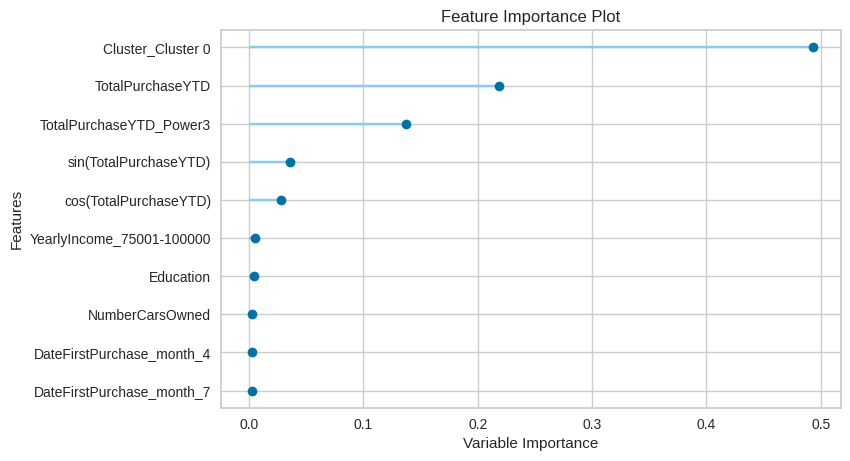

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [48]:
# plot the feature importance of the best model
plot_model(best_model, plot='feature')

**Best Model Plot Result**

Based on the best model plot above, this are the important feature information for our analysis. Although cluster 0 are those important customers but their purchasing power is not high, they may not spend too much in our store even we have a good discount or promotions in the future. Because the above data show us that their yearly income is not high and they might not have the budget to spend on bicycle. 



In [49]:
# since cluster 2 is the most important
# extract out cluster 2 customer demographics and compare to the biggest cluster (cluster 0)
df_cluster_2 = df_customer_rfm[df_customer_rfm['Cluster']=='Cluster 2']
df_cluster_0 = df_customer_rfm[df_customer_rfm['Cluster']=='Cluster 0']

In [50]:
df_cluster_0

BusinessEntityID  TotalPurchaseYTD DateFirstPurchase  BirthDate  \
0                  3058             19.20        2004-04-07 1979-05-07   
1                  3246            557.49        2003-10-24 1975-11-07   
2                  3089            -24.99        2004-03-04 1976-05-20   
3                  3273            -21.49        2004-02-12 1976-04-08   
4                  3446            -37.01        2004-02-12 1976-01-19   
...                 ...               ...               ...        ...   
18400             19928              6.49        2004-01-05 1951-11-11   
18401             20051          -2375.08        2004-01-07 1951-05-19   
18402             20442            404.77        2003-10-23 1951-05-17   
18403             19826             -4.00        2003-10-16 1951-07-06   
18406             11037              0.00        2003-09-06 1968-03-12   

      MaritalStatus YearlyIncome Gender  TotalChildren  NumberChildrenAtHome  \
0                 S  25001-50000      F            0.0                   0.0   
1                 S  25001-50000      F            0.0                   0.0   
2                 S  25001-50000      F            0.0                   0.0   
3                 S  25001-50000      F            0.0                   0.0   
4                 S  25001-50000      F            0.0                   0.0   
...             ...          ...    ...            ...                   ...   
18400             M  50001-75000      F            2.0                   1.0   
18401             M  50001-75000      M            2.0                   1.0   
18402             M  50001-75000      F            2.0                   1.0   
18403             M  50001-75000      F            2.0                   1.0   
18406             S      0-25000      M            1.0                   1.0   

             Education  ... NumberCarsOwned  CustomerID  PersonID  recency  \
0      Partial College  ...             1.0     26212.0    3058.0      115   
1      Partial College  ...             1.0     21126.0    3246.0      281   
2      Partial College  ...             1.0     18033.0    3089.0      149   
3      Partial College  ...             1.0     27832.0    3273.0      170   
4      Partial College  ...             1.0     22707.0    3446.0      170   
...                ...  ...             ...         ...       ...      ...   
18400  Partial College  ...             2.0     19018.0   19928.0      208   
18401  Partial College  ...             2.0     24683.0   20051.0      206   
18402  Partial College  ...             2.0     22780.0   20442.0      282   
18403  Partial College  ...             2.0     17170.0   19826.0      289   
18406  Partial College  ...             0.0     16574.0   11037.0       63   

       frequency  monetary    Cluster  average_spend_value years_of_service  \
0              2     23.78  Cluster 0              11.8900         2.769863   
1              3    565.47  Cluster 0             188.4900         2.315068   
2              1     24.99  Cluster 0              24.9900         2.676712   
3              1     21.49  Cluster 0              21.4900         2.619178   
4              3     62.97  Cluster 0              20.9900         2.619178   
...          ...       ...        ...                  ...              ...   
18400          2    133.49  Cluster 0              66.7450         2.515068   
18401          2   2393.06  Cluster 0            1196.5300         2.520548   
18402          4    722.77  Cluster 0             180.6925         2.312329   
18403          2     13.98  Cluster 0               6.9900         2.293151   
18406          3     44.97  Cluster 0              14.9900         2.912329   

       lifetime_value  
0           32.933671  
1          436.367260  
2           66.891041  
3           56.286137  
4           54.976548  
...               ...  
18400      167.868247  
18401     3015.911233  
18402      417.820466  
18403       16.029123  
18406  

In [51]:
# run pandas profiling on cluster 2
df_cluster_2.profile_report().to_file("cluster_2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [52]:
df_cluster_2.profile_report(minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
# run pandas profiling on cluster 0
df_cluster_0.profile_report().to_file("cluster_0.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
df_cluster_0.profile_report(minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#### Comparison of Cluster 2 to Cluster 0

# higher TotalPurchaseYTD compared to cluster 0
# more 50-75k YearlyIncome
# higher % of bachelors 
# double the frequency
# ten times the monetary
# 5 times lifetime value


**Comparison of Cluster 2 to Cluster 0 Conclusion**

- Cluster 2 have the higher total purchase YTD as compared to cluster 0. The data above show us that cluster 2 customers who spent more in ur bike store as compared to cluster 0. We should target clster 2 customers by introduce our marketing plan and strategies to attract them to our store. This will increase the chance for them to spend more during our promotions period. 

- Based on the data above, cluster 2 customers have higher yearly income which are on 50 - 75K than cluster 0 customers. This mean that although cluster 0 visited our bike store more frequently but they are not spending more on our products. They are just looking around in different stores and see which store offer the best price. 

- As compared cluster 2 to cluster 0, cluster 0 have more bachelors than in cluster 2. Although indicated that cluster 0 have more bachelors, but they may not be too interested in bicycle as comapred to cluster 2. Because cluster 0 does not spent more money in our store than cluster or they may not have more budget on their bicycle. 

Our marketing strategies should focus on cluster 2 bachelors so that our return on investment (ROI) will be able to provide the maximum return based on the amount of money that we spend on our marketing plans.

- Frequency is double for cluster 0 compared with cluster 2. The frequency is the higher the better therefore, we will need to make cluster 2 customers group to visit our store more often to improve their frequency and also improve our revenue income. 

- Cluster 2 monetary are ten times more than cluster 0 based on the pandas profiling data. This is a good thing because this reflect that cluster 2 customers are spending more money than cluster 0 when they visited our store. We should get cluster 2 customers to increase their spending each time they visit our bike store by targeting them with more promtions. 

- As for customer lifetime value, cluster 2 is five times more than cluster 0 costmers. This show that cluster 2 customers are contribute five times net profits compared to cluster 0 customers. 

By comparision on cluster 2 and cluster 0, the above data provide us a clear direction and narrow down the customers group which we can focus on our limited but resourceful marketing strategies to achieve our idea of aquire new customer and retain the current VIP customers for our bike store. 
